In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from mytools import *

# Jupyter notebook related
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Built-in modules
import pickle
import gzip
import sys
import os
import datetime as dt
from pathlib import Path


# Basics of Python data handling and visualization
import numpy as np
np.random.seed(42)
#import geopandas as gpd
import matplotlib as mpl
from matplotlib.colors import Normalize
Normalize = Normalize(vmin = 0, vmax= 1)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm.auto import tqdm
from tqdm import tqdm
import random


#PREPROCESSING CHAIN
import skimage
from skimage.filters import threshold_multiotsu, threshold_otsu, median, gaussian, threshold_li
import skimage.morphology as morphology
from skimage.morphology import disk, square, diamond, closing, opening, black_tophat, white_tophat, dilation, erosion
from skimage.segmentation import chan_vese , morphological_chan_vese, checkerboard_level_set, circle_level_set, clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.exposure import *
from skimage import util
from skimage.util import invert
import imageio
import PIL

from sklearn.preprocessing import minmax_scale

# Data Paths
datapath = '/content/drive/MyDrive/Colab Notebooks/data/hindiya_data/'
shared_datapath= '/content/drive/MyDrive/AI for Earth Share/Sub-Groups/Dying Rivers/Data/hindiya_data/'

In [ ]:
with gzip.open(datapath + 'hindiya_water.gz') as f:
  water = pickle.load(f)
  
type(water), len(water), water[-1].shape

(list, 416, (1851, 2459))

-0.5466669 0.9336158
0.0 1.0


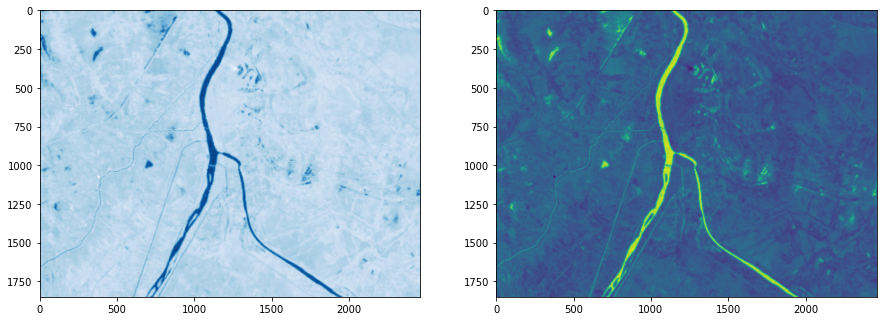

In [ ]:
img = water[39]
print (np.min(img), np.max(img))
norm = (img - np.min(img)) / (np.max(img) - np.min(img) )
print (np.min(norm), np.max(norm))

plt.figure(figsize = (15,15))

plt.subplot(121)
plt.imshow(water[39], cmap = 'Blues')

plt.subplot(122)
plt.imshow(img, cmap = 'viridis')

The normalized difference water index is most appropriate for water body mapping.


Values of water bodies are larger than 0.5. Vegetation has smaller values.

Built-up features have positive values between zero and 0.2.

0.020328607


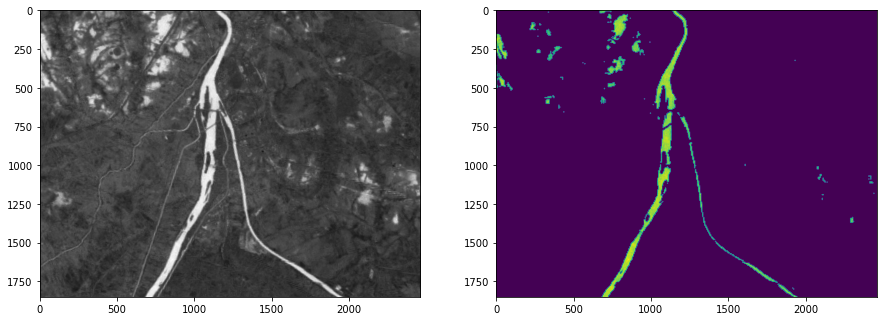

In [ ]:
img = water[99]
body = np.copy(img)
mask = ~(body >= 0.5)
body[mask] = 0

print(np.mean(body))

plt.figure(figsize = (15,15))

plt.subplot(121)
plt.imshow(img,  cmap = 'gray')

plt.subplot(122)
plt.imshow(body, cmap = 'viridis')

In [ ]:
corrupt_indxs = []
for indx, img in enumerate(water):
  if not np.std(img) > 0.05:
    corrupt_indxs.append(indx)

len(corrupt_indxs)

82

In [ ]:
corrupt_indxs 

In [ ]:
corrupts_imgs = [img for idx, img in enumerate(water) if idx in corrupt_indxs ]
corrupt_indxs = [indx for indx in corrupt_indxs if indx not in [235, 202, 313, 290]]
print(len(corrupts_imgs))
corrupts_imgs = [img for idx, img in enumerate(water) if idx in corrupt_indxs ]
print(len(corrupts_imgs))

82
78


In [ ]:
# 235, 202, 313, 290 

In [ ]:
# with gzip.open(datapath +'corrupted_indxs.gz', 'wb') as f:
#   pickle.dump(corrupt_indxs, f)

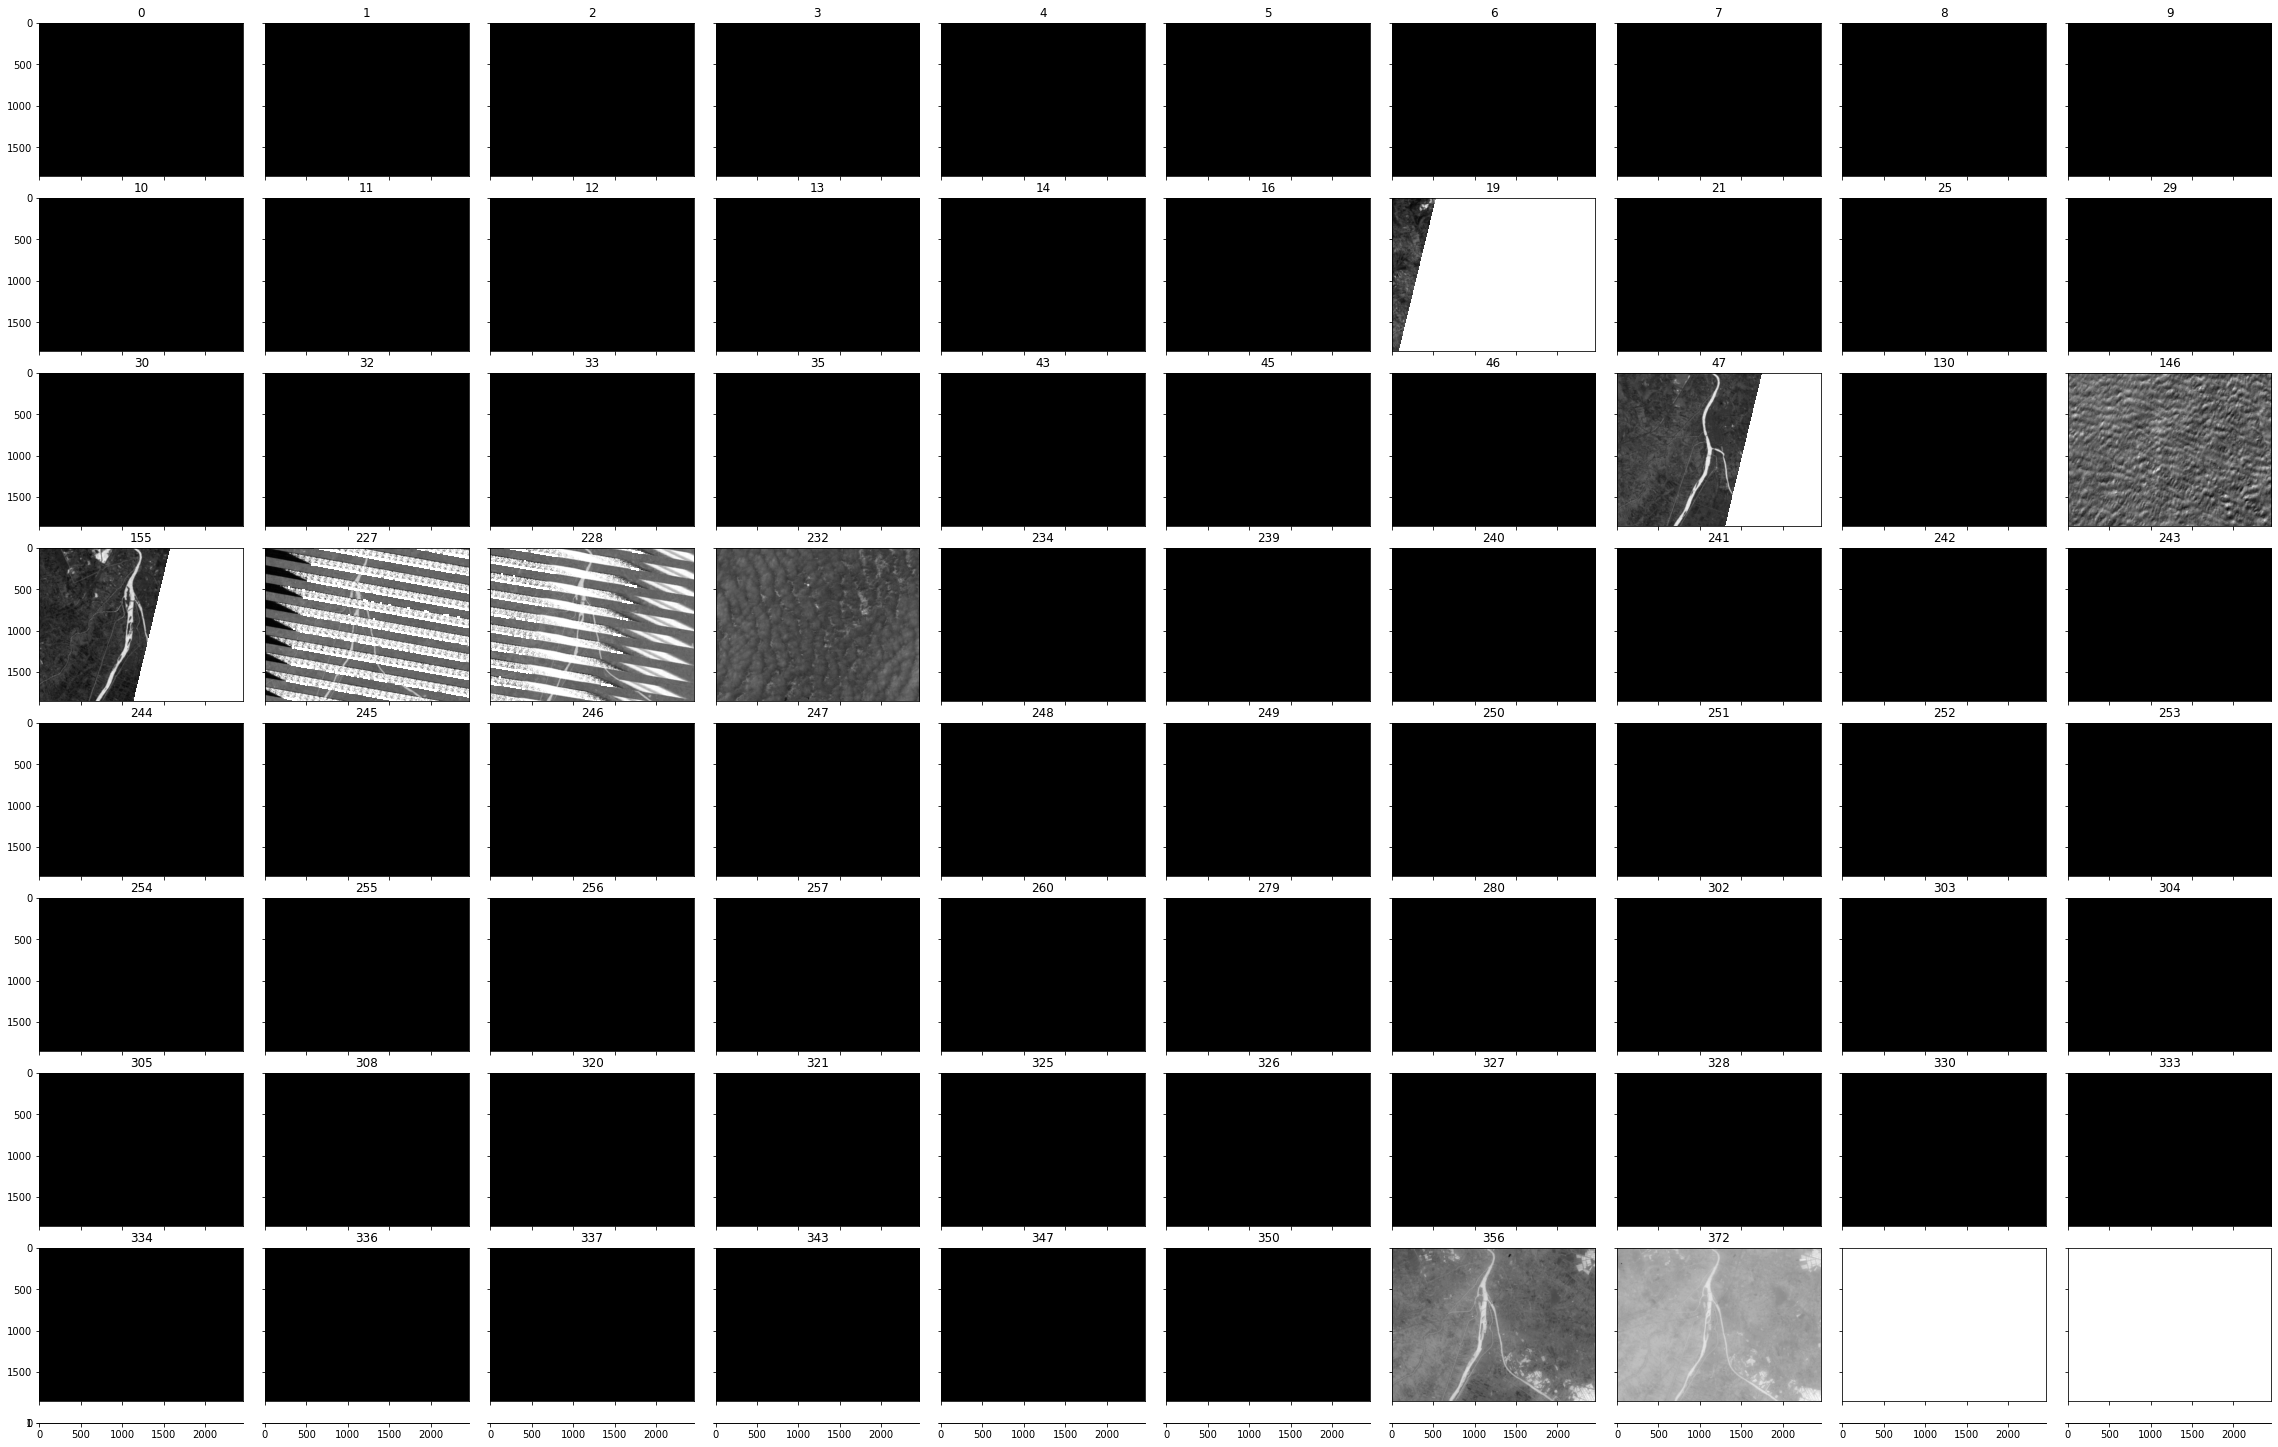

In [ ]:
fig = plt.figure(figsize= (40,90))
grid = ImageGrid(fig, 111, (9,10), axes_pad= 0.3)

for t, img, grd in zip(corrupt_indxs, corrupts_imgs, grid):
  grd.imshow(img, cmap= 'gray')
  grd.set_title(t)

In [ ]:
water_cleaned = [img for indx, img in enumerate(water) if indx not in corrupt_indxs]
len(water_cleaned)

338

In [ ]:
from mytools import *
water_mons_means = mean_index(water_cleaned, 0.5)
water_mons_means.shape

(338,)

In [ ]:
2021 - 1984

37

In [ ]:
splits = np.array_split(water_mons_means, 2021 - 1984)
len(splits), splits[4].shape

(37, (10,))

In [ ]:
from mytools import *

In [ ]:
from mytools import *
n_years = 2022 - 1984
yr_means = yearly_means(water_mons_means, n_years)
yr_medians = yearly_medians(water_mons_means, n_years)
yr_means.shape, yr_medians.shape

((38,), (38,))

In [ ]:
from datetime import datetime as dt
current_yr = dt.today().year
yr_list = [i for i in range(1984, 2022)]
print(len(yr_list))
plot_means = {yr: mean for yr, mean in zip(yr_list, yr_means)}
plot_medians = {yr: med for yr, med in zip(yr_list, yr_medians)}
plot_means

38


{1984: 0.010649750009179115,
 1985: 0.010477777570486069,
 1986: 0.005911946762353182,
 1987: 0.009506471455097198,
 1988: 0.012849218212068081,
 1989: 0.012938697822391987,
 1990: 0.012414958328008652,
 1991: 0.014094420708715916,
 1992: 0.006809469778090715,
 1993: 0.010130100883543491,
 1994: 0.012020526453852654,
 1995: 0.014610487967729568,
 1996: 0.01212275680154562,
 1997: 0.016797687858343124,
 1998: 0.01044483669102192,
 1999: 0.012589684687554836,
 2000: 0.013313635252416134,
 2001: 0.008679262362420559,
 2002: 0.007610676810145378,
 2003: 0.006230573169887066,
 2004: 0.0030594319105148315,
 2005: 0.006177149713039398,
 2006: 0.0061659133061766624,
 2007: 0.009876460768282413,
 2008: 0.007935560308396816,
 2009: 0.008757769130170345,
 2010: 0.006335737649351358,
 2011: 0.004015976097434759,
 2012: 0.006058205850422382,
 2013: 0.01525410357862711,
 2014: 0.0067192018032073975,
 2015: 0.005154970567673445,
 2016: 0.0037819917779415846,
 2017: 0.004136931616812944,
 2018: 0.0105

In [ ]:
plot_medians

{1984: 0.009689746424555779,
 1985: 0.012258289381861687,
 1986: 0.004490384832024574,
 1987: 0.007741532754153013,
 1988: 0.011634636670351028,
 1989: 0.010903948917984962,
 1990: 0.012810883112251759,
 1991: 0.013620616868138313,
 1992: 0.007133891806006432,
 1993: 0.010492178611457348,
 1994: 0.013909722678363323,
 1995: 0.016408182680606842,
 1996: 0.014150077477097511,
 1997: 0.0175767932087183,
 1998: 0.011584415100514889,
 1999: 0.014532980509102345,
 2000: 0.012148847803473473,
 2001: 0.009863438084721565,
 2002: 0.010324290953576565,
 2003: 0.006993711460381746,
 2004: 0.00029900544905103743,
 2005: 0.008277771063148975,
 2006: 0.0070588430389761925,
 2007: 0.010708129964768887,
 2008: 0.008578997105360031,
 2009: 0.010172554291784763,
 2010: 0.009127586148679256,
 2011: 0.001177146565169096,
 2012: 0.007155102677643299,
 2013: 0.014376508072018623,
 2014: 0.004348470829427242,
 2015: 0.0022421551402658224,
 2016: 0.0,
 2017: 0.0015038501005619764,
 2018: 0.012752432376146317,

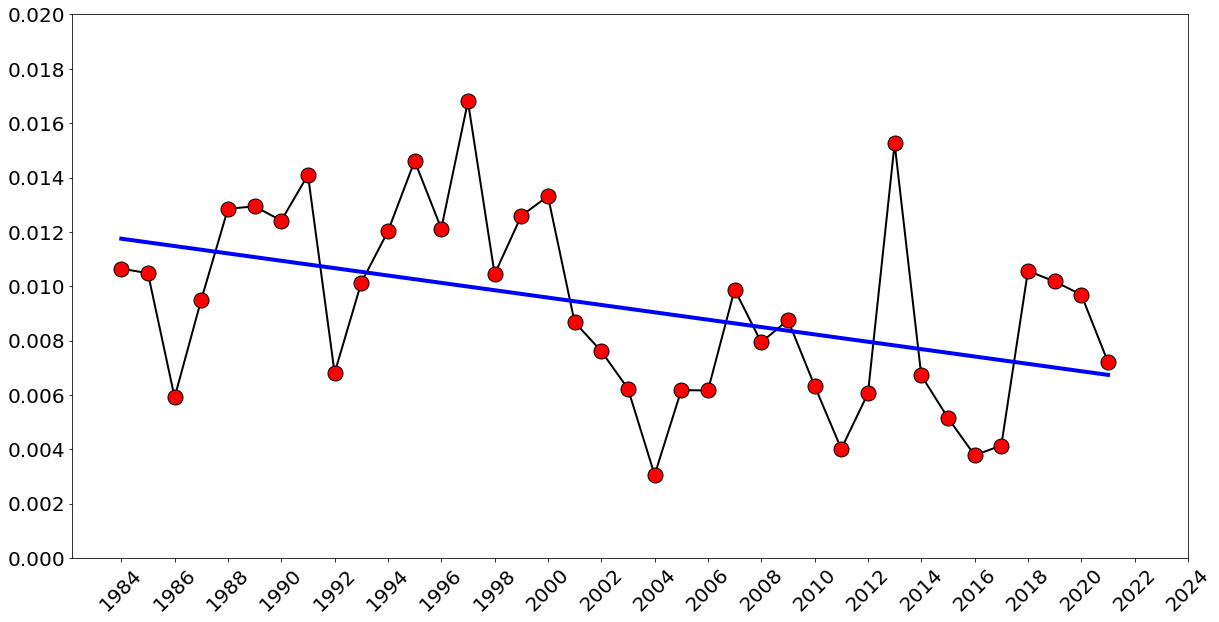

In [ ]:
filtered_dict = {key: value for key, value in plot_means.items()}
length, means  = zip(*filtered_dict.items())
plt.figure(figsize = (20,10))
plt.plot(length, means, '-ok' , ls = '-',
         markerfacecolor = 'red',
         markersize=15,
         linewidth = 2)

p = np.polyfit(length, means,1)
polyvals = np.polyval(p, length) 
plt.plot(length, polyvals, color='blue', ls = '-',  linewidth = 4, label='Best Fit - Projected Sales')
plt.yticks(np.arange(0, max(means) + 0.004, 0.002), fontsize = 20)

plt.xticks(np.arange(min(length), max(length)+5, step = 2), rotation = 45, fontsize = 20)
# for (year, value) in zip(length, filtered_means):
#   value = round(value, 4)
#   plt.annotate(value, (year,value + 0.0003), fontsize = 15, color = 'b')
plt.show()

In [ ]:
pip install -U gif

  Created wheel for gif: filename=gif-3.0.0-py3-none-any.whl size=4817 sha256=31bfe94dd56d55c54fb95ddd12c1dc674b85dcc6f4b8cfbc651cbd4f0344713b
  Stored in directory: /root/.cache/pip/wheels/21/63/09/b1e3c512d244da0a7c1d9565f09592612d04b79ccbb95146ae
Successfully built gif


In [ ]:
import gif
import random
gif.options.matplotlib["dpi"] = 300

In [ ]:
@gif.frame
def plot(filtered_dict, n, n_years):
  length, means  = zip(*filtered_dict.items())
  means = means[:n]
  length  = length[:n]

  plt.figure(figsize = (20,10))
  plt.plot(length, means, '-ok' , ls = '-',
          markerfacecolor = 'red',
          markersize=15,
          linewidth = 2)

  # p = np.polyfit(length, means,1)
  # polyvals = np.polyval(p, length) 
  # plt.plot(length, polyvals, color='blue', ls = '-.',  linewidth = 2, label='Best Fit - Projected Sales')

  plt.yticks(fontsize = 20)
  plt.xticks(rotation = 45, fontsize = 20)
  
  if n == n_years - 1:
    p = np.polyfit(length, means,1)
    polyvals = np.polyval(p, length) 
    plt.plot(length, polyvals, color='blue', ls = '-',  linewidth = 4, label='Best Fit - Projected Sales')
  

In [ ]:
len(filtered_dict), n_years

(38, 38)

In [ ]:
datapath

'/content/drive/MyDrive/Colab Notebooks/data/hindiya_data/'

In [ ]:
frames = []
for n in range(n_years):
    frame = plot(filtered_dict, n, n_years)
    frames.append(frame)

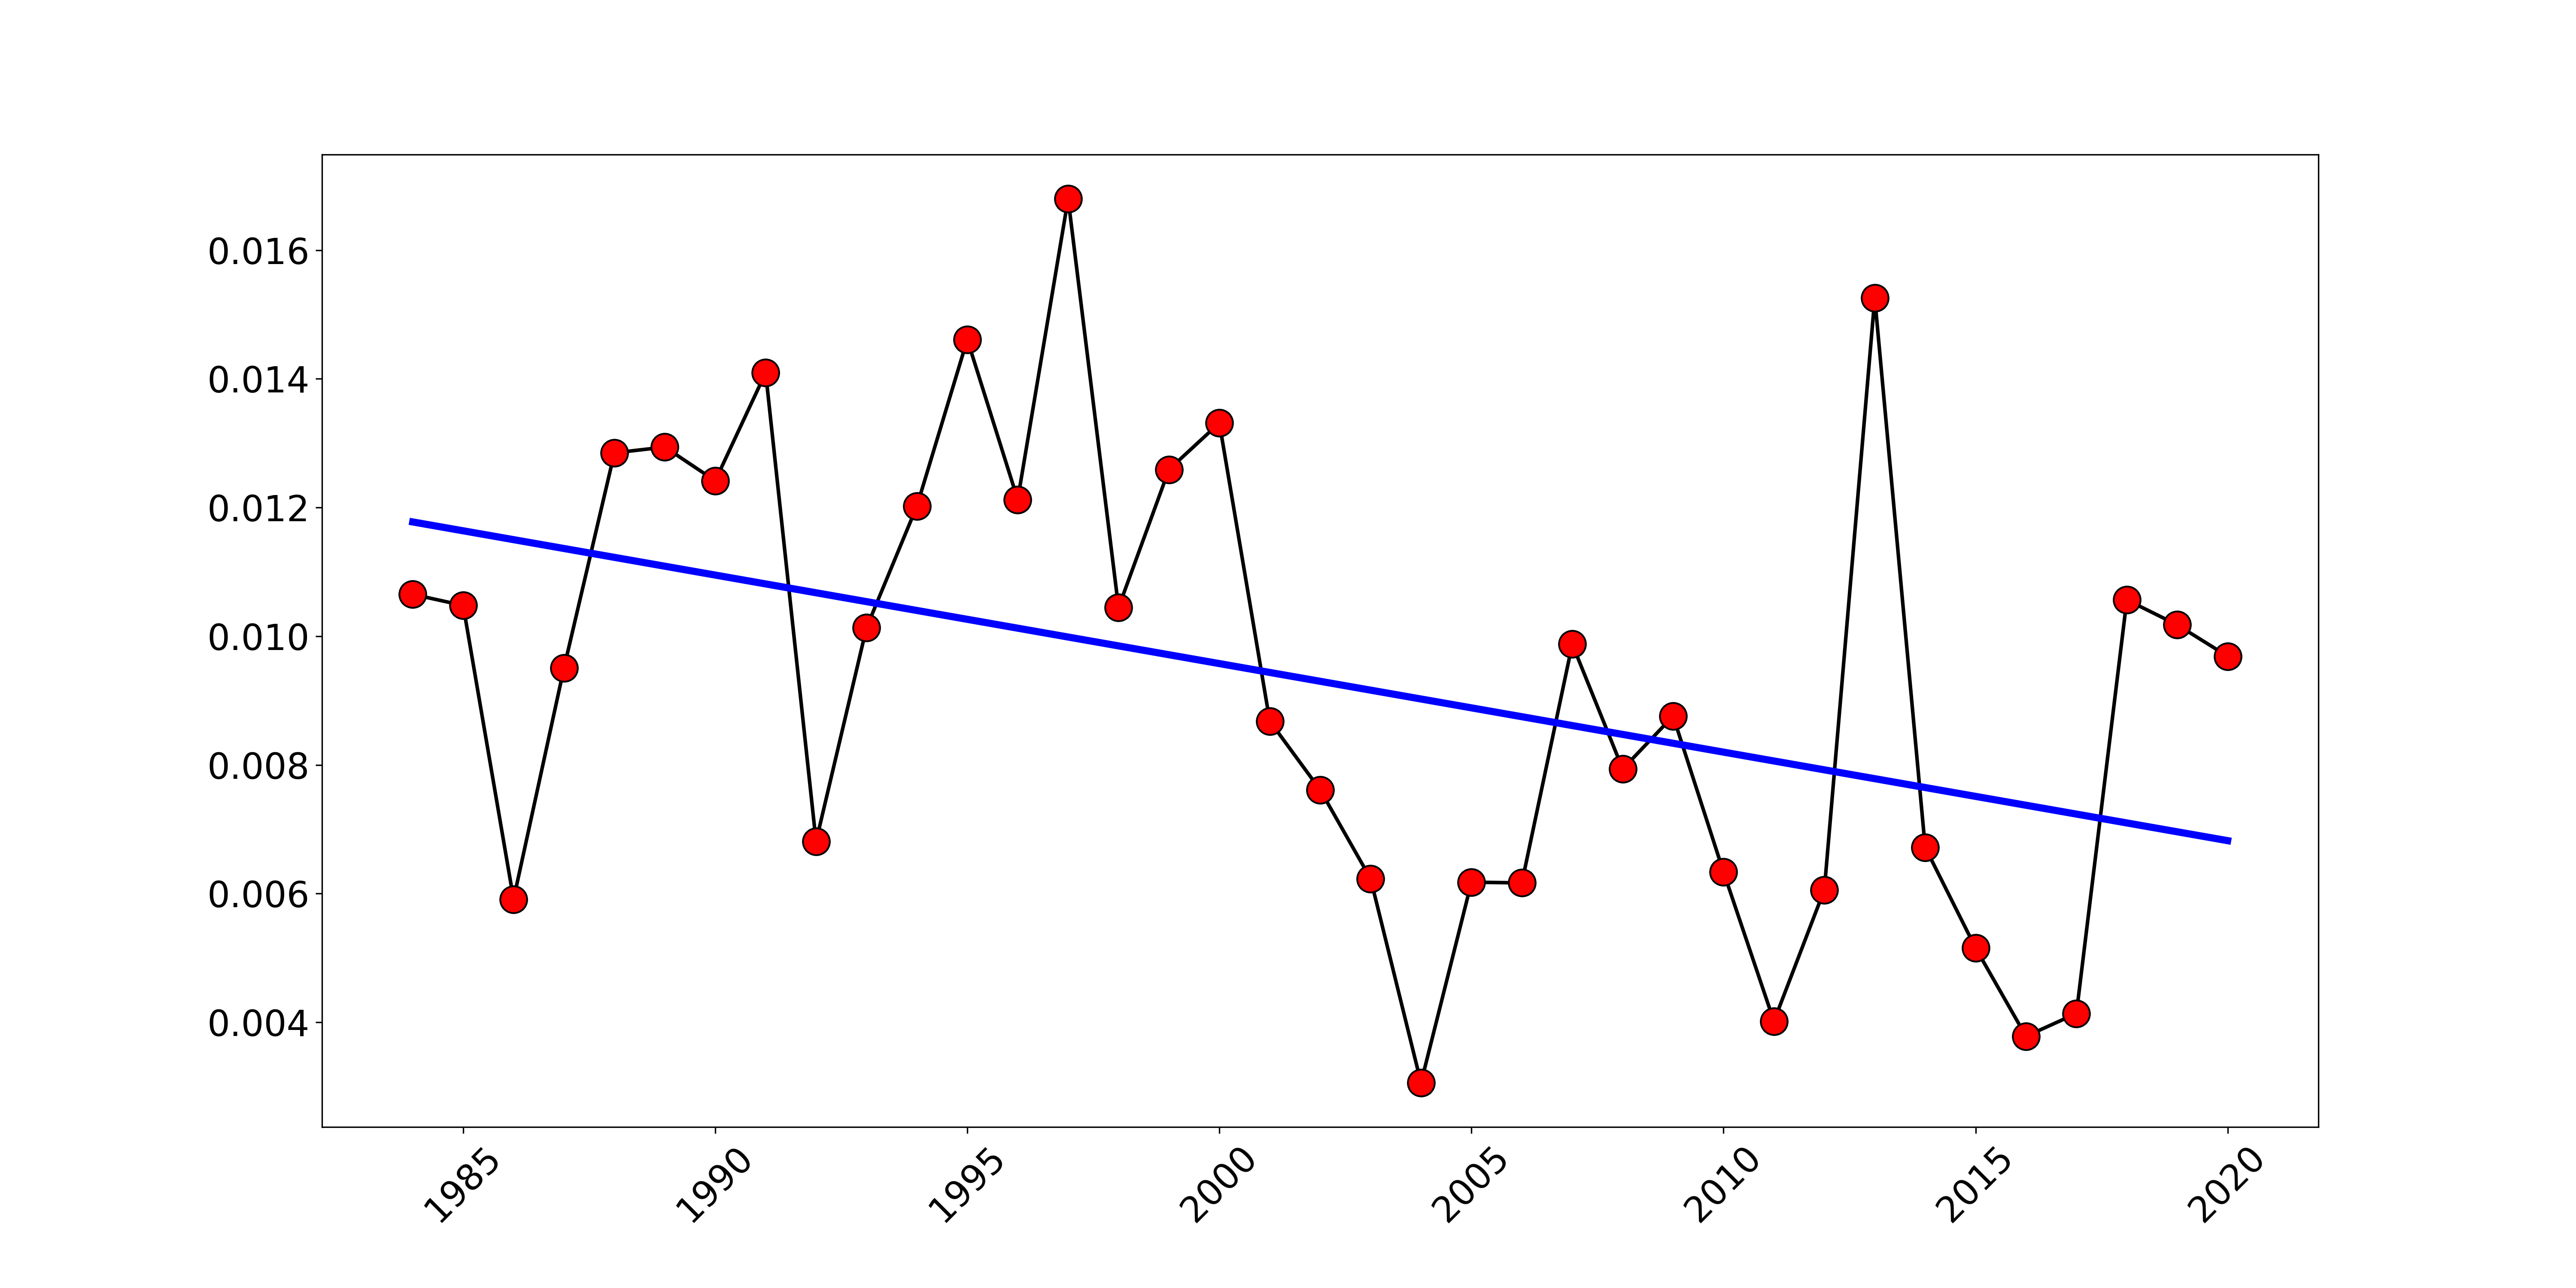

In [ ]:
frames[-1]

In [ ]:
for t, frame in enumerate(frames):
  pad = str(t).zfill(3)
  frame.save(datapath + 'water_stats_fix/' + f'water_{pad}.png')

In [ ]:
gif.save(frames, datapath + 'water_yrMeans.gif', duration=5, unit="s", between="startend")

In [ ]:
import IPython
from IPython.display import Image
Image(open('water_yrMeans.gif','rb').read())